In [11]:
#Loading the cleaned testing data

import pandas as pd
X_test = pd.read_csv("cleaned_data/X_test.csv")
y_test = pd.read_csv("cleaned_data/y_test.csv")

In [12]:
# Force CPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#import tensorflow libraries
import tensorflow as tf

In [13]:
#Load the model from memory
from tensorflow.keras.models import load_model

#Change model when required
# model = load_model("models/initial_model.keras") 
model = load_model("models/improved_model.keras")
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,285 (67.52 KB)

 Trainable params: 5,761 (22.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,524 (45.02 KB)

In [14]:
#Making predictions on the testing set
y_prob = model.predict(X_test).ravel()
y_pred = [1 if prob>=0.5 else 0 for prob in y_prob] #Convert probability to 0 and 1 predictions (Threshold at 0.5)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x70eae85ef420> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


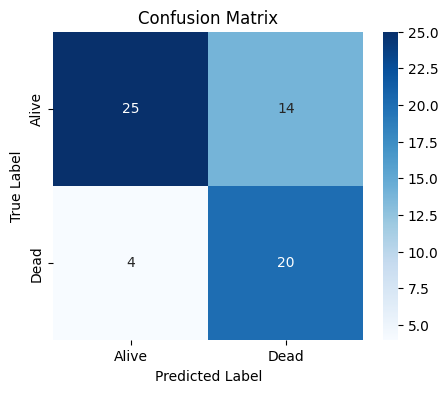

Classification report:
               precision    recall  f1-score   support

       Alive      0.862     0.641     0.735        39
        Dead      0.588     0.833     0.690        24

    accuracy                          0.714        63
   macro avg      0.725     0.737     0.712        63
weighted avg      0.758     0.714     0.718        63



In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Generating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Alive', 'Dead']
plt.figure(figsize=(5, 4))
sns.heatmap(cm,
            annot=True,
            cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#Key Metrics
print("Classification report:\n", classification_report(y_test, y_pred, digits=3, target_names=labels))